# Paso 1: Configuración inicial
### Objetivo:
Crear un entorno base donde generemos matrices de costos y exploremos las soluciones para el problema de asignación.

In [6]:
import numpy as np
import itertools
import time

# Función para generar una matriz de costos aleatoria
def generar_matriz_costos(n, min_val=1, max_val=100):
    return np.random.randint(min_val, max_val + 1, size=(n, n))

# Ejemplo: generar y mostrar una matriz de costos para n=5
n = 5
matriz_costos = generar_matriz_costos(n)
print("Matriz de costos:")
print(matriz_costos)


Matriz de costos:
[[77 45 93 68 36]
 [94 94  5 97 96]
 [14 33 19 62 24]
 [61 20 26 95 40]
 [58 58 52 40 25]]


### Resultado esperado:
1. Una matriz n×n generada aleatoriamente con valores entre `min_val` y `max_val`.
2. Esto nos da una base para usar en ambos algoritmos.

# Algoritmo Ingenuo (AI)

---

### Objetivo:
Explorar todas las permutaciones posibles de asignaciones y calcular el costo mínimo.

### Explicación:
1. Generamos todas las permutaciones posibles de asignaciones de tareas a agentes.
2. Para cada permutación, calculamos el costo total.
3. Guardamos la asignación con el costo más bajo.

In [10]:
def algoritmo_ingenuo(matriz_costos):
    n = len(matriz_costos)
    permutaciones = itertools.permutations(range(n))  # Todas las asignaciones posibles
    costo_minimo = float('inf')  # Inicializamos con un costo infinito
    mejor_asignacion = None

    # Evaluar cada permutación
    for perm in permutaciones:
        # Costo de la asignación actual
        costo_actual = sum(matriz_costos[i][perm[i]] for i in range(n))
        if costo_actual < costo_minimo:
            costo_minimo = costo_actual
            mejor_asignacion = perm

    return costo_minimo, mejor_asignacion

# Probar el AI con la matriz generada
start_time = time.time()
costo_ai, mejor_asignacion_ai = algoritmo_ingenuo(matriz_costos)
end_time = time.time()

print("\n--- Resultados Algoritmo Ingenuo ---")
print(f"Costo mínimo: {costo_ai}")
print(f"Mejor asignación: {mejor_asignacion_ai}")
print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")


--- Resultados Algoritmo Ingenuo ---
Costo mínimo: 144
Mejor asignación: (4, 3, 0, 2, 1)
Tiempo de ejecución: 0.0003 segundos


## Prueba Algoritmo Ingenuo

In [11]:
# Probar el AI con una matriz de ejemplo
start_time = time.time()
costo_minimo, mejor_asignacion = algoritmo_ingenuo(matriz_costos)
end_time = time.time()

print("\n--- Resultados Algoritmo Ingenuo ---")
print(f"Costo mínimo: {costo_minimo}")
print(f"Mejor asignación: {mejor_asignacion}")
print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")


--- Resultados Algoritmo Ingenuo ---
Costo mínimo: 144
Mejor asignación: (4, 3, 0, 2, 1)
Tiempo de ejecución: 0.0003 segundos


# Algoritmo de Ramificación y Poda (ARP)

---

### Objetivo:
Explorar las asignaciones de forma más eficiente descartando aquellas que no podrían mejorar la solución óptima.

### Explicación:
- Implementamos un algoritmo recursivo.
- Llevamos un seguimiento de las tareas asignadas y del costo parcial.
- Utilizamos "poda" para evitar explorar ramas con costos superiores al mejor encontrado hasta ahora.

In [12]:
class AsignacionARP:
    def __init__(self, matriz_costos):
        self.matriz_costos = matriz_costos
        self.n = len(matriz_costos)
        self.tareas_asignadas = [False] * self.n
        self.costo_minimo = float('inf')
        self.mejor_asignacion = None

    def resolver(self):
        """
        Resuelve el problema usando ramificación y poda.
        Returns:
            tuple: (Costo mínimo, Mejor asignación)
        """
        self._ramificacion_poda(0, 0, [])
        return self.costo_minimo, self.mejor_asignacion

    def _ramificacion_poda(self, agente, costo_actual, asignacion_actual):
        # Caso base: asignamos todas las tareas
        if agente == self.n:
            if costo_actual < self.costo_minimo:
                self.costo_minimo = costo_actual
                self.mejor_asignacion = list(asignacion_actual)
            return

        # Explorar tareas disponibles
        for tarea in range(self.n):
            if not self.tareas_asignadas[tarea]:
                # Marcar la tarea como asignada
                self.tareas_asignadas[tarea] = True
                asignacion_actual.append(tarea)

                # Calcular nuevo costo y continuar si es prometedor
                nuevo_costo = costo_actual + self.matriz_costos[agente][tarea]
                if nuevo_costo < self.costo_minimo:
                    self._ramificacion_poda(agente + 1, nuevo_costo, asignacion_actual)

                # Retroceder
                asignacion_actual.pop()
                self.tareas_asignadas[tarea] = False

# Probar el ARP con la misma matriz
arp = AsignacionARP(matriz_costos)

start_time = time.time()
costo_arp, mejor_asignacion_arp = arp.resolver()
end_time = time.time()

print("\n--- Resultados Algoritmo ARP ---")
print(f"Costo mínimo: {costo_arp}")
print(f"Mejor asignación: {mejor_asignacion_arp}")
print(f"Tiempo de ejecución: {end_time - start_time:.4f} segundos")



--- Resultados Algoritmo ARP ---
Costo mínimo: 144
Mejor asignación: [4, 3, 0, 2, 1]
Tiempo de ejecución: 0.0002 segundos


# Comparación de Algoritmos

In [17]:
# Valores de n para la prueba
tamanios = [5, 6, 7, 8, 9, 10, 11]
resultados = []  # Lista para almacenar resultados

for n in tamanios:
    print(f"\n=== Resolviendo para n = {n} ===")
    
    # Generar matriz de costos
    matriz_costos = generar_matriz_costos(n)
    print(f"Matriz de costos generada para n = {n}:")
    print(matriz_costos)

    # Algoritmo Ingenuo (AI)
    start_time = time.time()
    costo_ai, mejor_asignacion_ai = algoritmo_ingenuo(matriz_costos)
    tiempo_ai = time.time() - start_time
    
    # Algoritmo ARP
    arp = AsignacionARP(matriz_costos)
    start_time = time.time()
    costo_arp, mejor_asignacion_arp = arp.resolver()
    tiempo_arp = time.time() - start_time

    # Guardar resultados
    resultados.append({
        "n": n,
        "costo_ai": costo_ai,
        "tiempo_ai": tiempo_ai,
        "costo_arp": costo_arp,
        "tiempo_arp": tiempo_arp,
        "igual_costo": costo_ai == costo_arp  # Verifica si ambos encontraron el mismo costo mínimo
    })
    
    # Mostrar resultados parciales
    print("\n--- Resultados para n =", n, "---")
    print(f"AI: Costo mínimo: {costo_ai}, Tiempo: {tiempo_ai:.4f} segundos")
    print(f"ARP: Costo mínimo: {costo_arp}, Tiempo: {tiempo_arp:.4f} segundos")
    print(f"¿Ambos algoritmos encontraron el mismo costo mínimo?: {costo_ai == costo_arp}")

# Mostrar todos los resultados al final
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\n--- Resumen Comparativo de Resultados ---")
print(df_resultados)



=== Resolviendo para n = 5 ===
Matriz de costos generada para n = 5:
[[77 30 32 11  8]
 [25 91  6 77 68]
 [34 12 95 93 93]
 [33 60 97 43  2]
 [24 37  5 76 47]]

--- Resultados para n = 5 ---
AI: Costo mínimo: 55, Tiempo: 0.0002 segundos
ARP: Costo mínimo: 55, Tiempo: 0.0001 segundos
¿Ambos algoritmos encontraron el mismo costo mínimo?: True

=== Resolviendo para n = 6 ===
Matriz de costos generada para n = 6:
[[30 26 59 14 39 10]
 [51 58 82 97 29 42]
 [51 73 16 90 11 36]
 [ 1 81 10 17 71 27]
 [57 68 11  2  1 91]
 [11  8 60 51 87 53]]

--- Resultados para n = 6 ---
AI: Costo mínimo: 66, Tiempo: 0.0015 segundos
ARP: Costo mínimo: 66, Tiempo: 0.0002 segundos
¿Ambos algoritmos encontraron el mismo costo mínimo?: True

=== Resolviendo para n = 7 ===
Matriz de costos generada para n = 7:
[[62 34 69 83 93  5 29]
 [58 79 55 43  7 60 28]
 [62  2 51 39 88 68 62]
 [58 31 57 82 50 42  6]
 [80 58 30  6 88 93 14]
 [91 27 76 66 31 21  1]
 [ 6 89 57 10 32 48 93]]

--- Resultados para n = 7 ---
AI: Co

## Visualización de Resultados
Para analizar mejor el rendimiento de ambos algoritmos, graficaremos los tiempos de ejecución usando `matplotlib`.

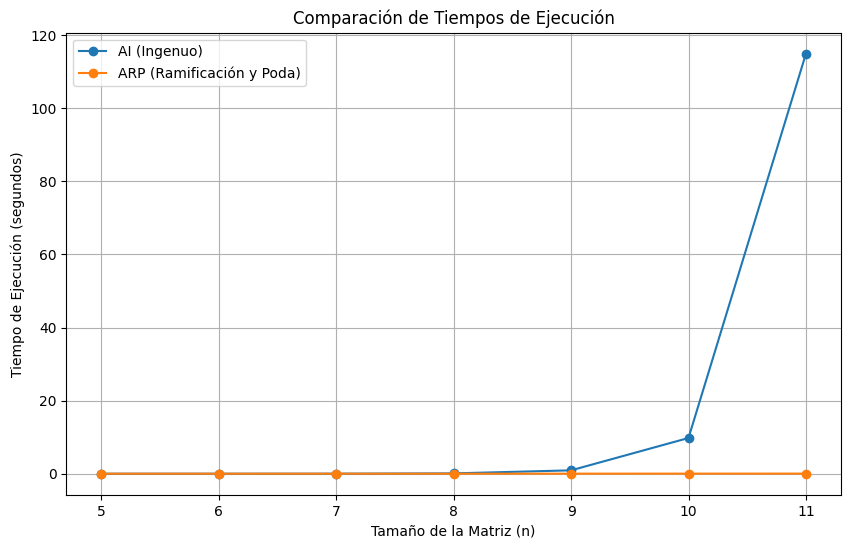

In [18]:
import matplotlib.pyplot as plt

# Graficar tiempos de ejecución
plt.figure(figsize=(10, 6))
plt.plot(df_resultados["n"], df_resultados["tiempo_ai"], label="AI (Ingenuo)", marker="o")
plt.plot(df_resultados["n"], df_resultados["tiempo_arp"], label="ARP (Ramificación y Poda)", marker="o")

# Configurar gráfico
plt.title("Comparación de Tiempos de Ejecución")
plt.xlabel("Tamaño de la Matriz (n)")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.grid()
plt.show()